In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

We will fit an ARX model of this form to a step, rectangular pulse and doublet response.

$$y(k) = a_1 y(k - 1) + a_2 y(k - 2) + b_1 u(k - 1) + b_2 u(k - 2)$$

### The Data was generated using a TCLab model and the input to Q1 was altered while keeping Q2 zero.

Adjusting Data

In [2]:
#Step response
df = pandas.read_csv('Step1.csv')
df.loc[-1] = [0, 20.95, 20.95, 0, 0]
df = df.sort_index()

In [3]:
# Rectangular pulse response
df1 = pandas.read_csv('Rpi1_Q1_only.csv')
df1.loc[-1] = [0, 20.95, 20.95, 0, 0]
df1 = df1.sort_index()

In [4]:
# Doublet response
df2 = pandas.read_csv('Doublet1_Q1_only.csv')
df2.loc[-1] = [0, 20.95, 20.95, 0, 0]
df2 = df2.sort_index()

### Generating Matrices

In [5]:
# Step response
y = df.T1
u = df.Q1

Y = []
X = []
for k in range(1, len(df)-1):
    Y.append([y[k]])
    X.append([y[k - 1], y[k - 2], u[k - 1], u[k - 2]])
Y = numpy.array(Y)
X = numpy.array(X)

In [6]:
# Rectangular pulse response
y1 = df1.T1
u1 = df1.Q1

Y1 = []
X1 = []
for k in range(1, len(df1)-1):
    Y1.append([y1[k]])
    X1.append([y1[k - 1], y1[k - 2], u1[k - 1], u1[k - 2]])
Y1 = numpy.array(Y1)
X1 = numpy.array(X1)


In [24]:
# Doublet response
y2 = df2.T1
u2 = df2.Q1

Y2 = []
X2 = []
for k in range(1, len(df2)-1):
    Y2.append([y2[k]])
    X2.append([y2[k - 1], y2[k - 2], u2[k - 1], u2[k - 2]])
Y2 = numpy.array(Y2)
X2 = numpy.array(X2)


### Solving for $\beta$

In [8]:
# Step response
beta, _, _, _ = numpy.linalg.lstsq(X,Y, rcond=None)
a1, a2, b1, b2 = beta.flat


In [9]:
# Rectangular pulse response
beta1, _, _, _ = numpy.linalg.lstsq(X1,Y1, rcond=None)
a11, a21, b11, b21 = beta1.flat


In [10]:
# Doublet response
beta2, _, _, _ = numpy.linalg.lstsq(X2,Y2, rcond=None)
a12, a22, b12, b22 = beta2.flat


### Use above solution and the ARX model to create predictions

In [12]:
# Step response
t = numpy.arange(len(df)-1)
us = u - u[0]  # deviation variables
y_arx = []
y_0 = y_1 = y_2 = 0
for i, ti in enumerate(t):
    u_1 = 0 if i < 1 else us[i-1]
    u_2 = 0 if i < 2 else us[i-2]
    y_2, y_1 = y_1, y_0
    y_0 = a1*y_1 + a2*y_2 + b1*u_1 + b2*u_2
    y_arx.append(y_0)

y_arxfit = numpy.array(y_arx) + y[0]  #  switch back from deviation variables


In [13]:
# Rectangular pulse response
t1 = numpy.arange(len(df1)-1)
us1 = u1 - u1[0]
y_arx1 = []
y01 = y11 = y21 = 0
for i, ti in enumerate(t1):
    u_1 = 0 if i < 1 else us1[i-1]
    u_2 = 0 if i < 2 else us1[i-2]
    y21, y11 = y11, y01
    y01 = a11*y11 + a21*y21 + b11*u_1 + b21*u_2
    y_arx1.append(y01)

y_arx1fit = numpy.array(y_arx1) + y1[0]

In [28]:
# Doublet response
t2 = numpy.arange(len(df2)-1)
us2 = u2 - u2[0]
y_arx2 = []
y02 = y12 = y22 = 0
for i, ti in enumerate(t2):
    u_1 = 0 if i < 1 else us2[i-1]
    u_2 = 0 if i < 2 else us2[i-2]
    y22, y12 = y12, y02
    y02 = a12*y12 + a22*y22 + b12*u_1 + b22*u_2
    y_arx2.append(y02)

y_arx2fit = numpy.array(y_arx2) + y2[0]

### Plotting observation versus prediction

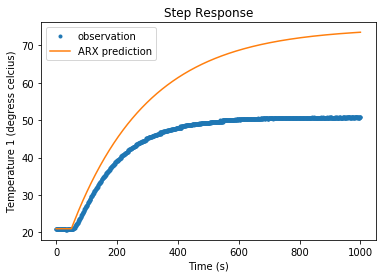

In [20]:
plt.plot(df.Time, df.T1, '.', label = 'observation')
plt.plot(t, y_arxfit, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Step Response")
plt.legend()
plt.show()

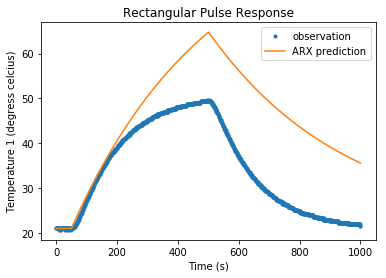

In [21]:
plt.plot(df1.Time, df1.T1, '.', label = 'observation')
plt.plot(t, y_arx1fit, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Rectangular Pulse Response")
plt.legend()
plt.show()

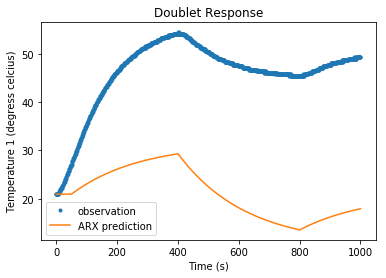

In [29]:
plt.plot(df2.Time, df2.T1, '.', label = 'observation')
plt.plot(t, y_arx2fit, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title("Doublet Response")
plt.legend()
plt.show()

In [18]:
# What about T2?